---

Install and load packages

---

In [ ]:
# Package for side-by-side ggplot plots
install.packages('patchwork')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)
library(dplyr)
library(patchwork)

---

Set theme for ggplot plots

---

In [ ]:
# Set ggplot theme for plotting
My_Theme = theme(axis.text.x = element_text(size = 9),
   axis.text.y = element_text(size = 9),
   axis.title.x = element_text(size = 11),
   axis.title.y = element_text(size = 11),
   plot.title = element_text(size = 12, hjust = 0.5, face = "bold"))

---

Load population heart rate data. Note that we will almost never have access to the entire population data.

---

In [ ]:
dfHR = read.csv('PopulationHeartRateData.csv', header = TRUE)
head(dfHR, 5)

,X,HeartRate_BPM
,<int>,<dbl>
1,0,71
2,1,74
3,2,68
4,3,66
5,4,62


---

Plot histograms of the population heart rate data.

---

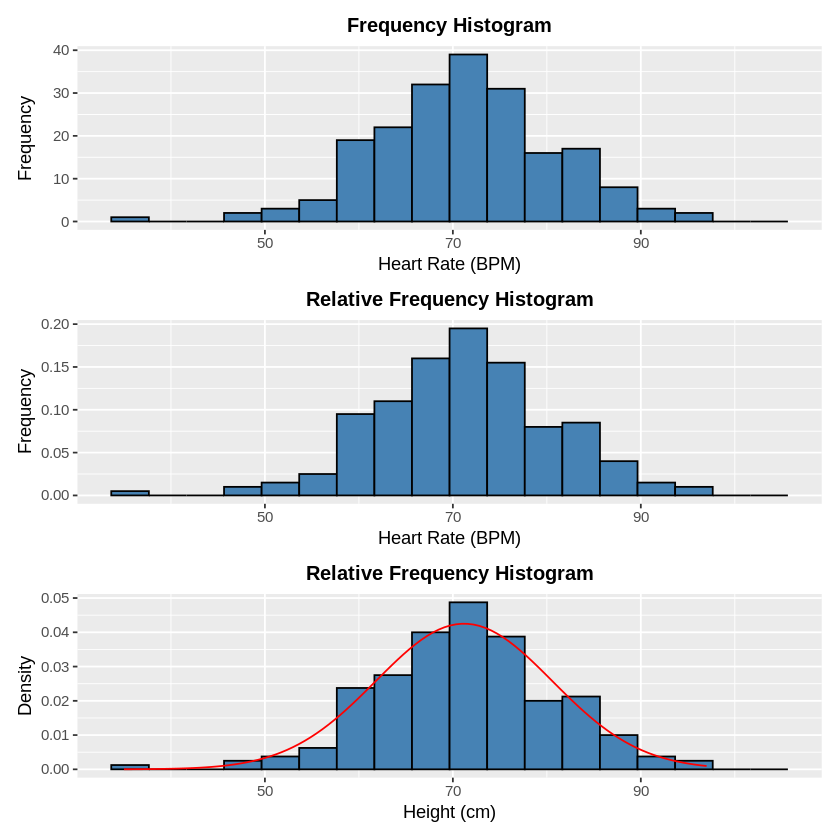

In [ ]:
## Plot histograms of the population heart rate data

mu = mean(dfHR$HeartRate_BPM) # population mean
sigma = sd(dfHR$HeartRate_BPM) # population standard deviation

# Bin width
delta = 4.0

# Plot the frequency histogram
p1 = ggplot(data = dfHR) +
  geom_histogram(aes(x = HeartRate_BPM, y = after_stat(count)),
  breaks = seq(mu-4*sigma, mu+4*sigma, by = delta),
  colour = 'black', fill = 'steelblue') +
  labs(x = 'Heart Rate (BPM)', y = 'Frequency') +
  ggtitle('Frequency Histogram') +
  My_Theme


# Plot the relative frequency histogram
p2 = ggplot(data = dfHR) +
  geom_histogram(aes(x = HeartRate_BPM, y = after_stat(count)/sum(after_stat(count))),
  breaks = seq(mu-4*sigma, mu+4*sigma, by = delta),
  colour = 'black', fill = 'steelblue') +
  labs(x = 'Heart Rate (BPM)', y = 'Frequency') +
  ggtitle('Relative Frequency Histogram') +
  My_Theme

# Plot the density histogram along with the density curve
p3 = ggplot(data = dfHR) +
  geom_histogram(aes(x = HeartRate_BPM, y = after_stat(density)),
  breaks = seq(mu-4*sigma, mu+4*sigma, by = delta),
  colour = 'black', fill = 'steelblue') +
  stat_function(fun = dnorm, args = list(mean = mu, sd = sigma), color = 'red') +
  labs(x = 'Height (cm)', y = 'Density') +
  ggtitle('Relative Frequency Histogram') +
  My_Theme

# Plot the histograms side-by-side
p1 + p2 + p3 + plot_layout(ncol = 1)

In [ ]:
mu
sigma

[1] 71.19

[1] 9.384789

---

Add vertical lines to the density histogram showing the position of the population mean, one standard deviation above the population mean, and one standard deviation below the population mean.

---

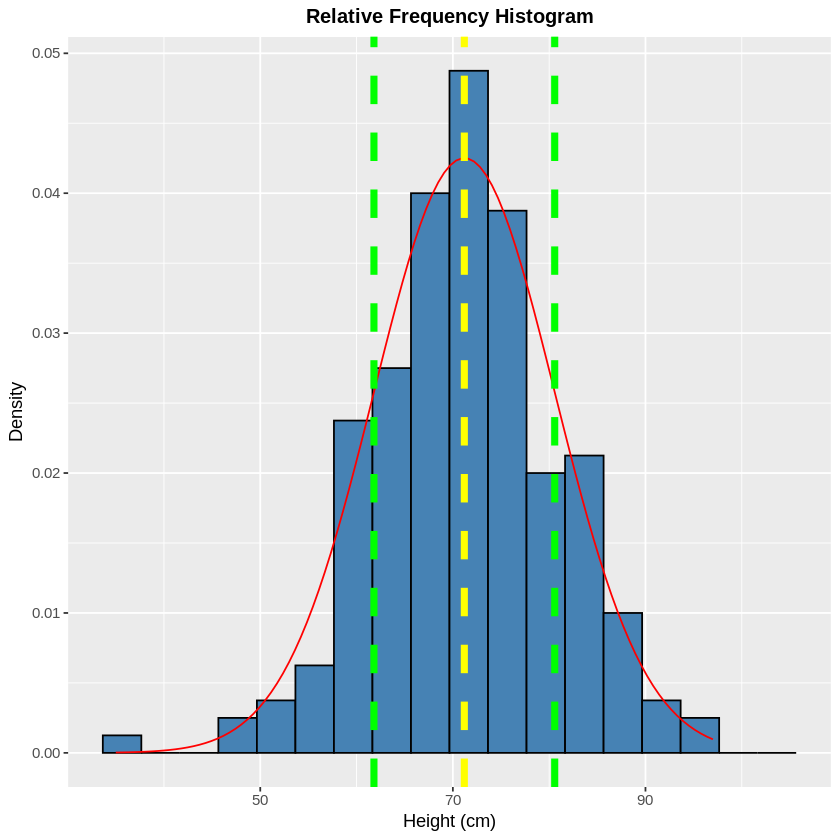

In [ ]:
p3 + geom_vline(aes(xintercept = mu), color = "yellow", linetype = "dashed", linewidth = 2) +
 geom_vline(aes(xintercept = mu+1*sigma), color = "green", linetype = "dashed", linewidth = 2) +
 geom_vline(aes(xintercept = mu-1*sigma), color = "green", linetype = "dashed", linewidth = 2)

---

The 68-95-99 rule for normal distribution

----

In [ ]:
##The 68-95-99 rule for normal distribution
mu
sigma

# P(mu-1*sigma <= X <= mu+1*sigma)
mean(dfHR$HeartRate_BPM >= mu-1*sigma & dfHR$HeartRate_BPM <= mu+1*sigma)

# P(mu-2*sigma <= X <= mu+2*sigma)
mean(dfHR$HeartRate_BPM >= mu-2*sigma & dfHR$HeartRate_BPM <= mu+2*sigma)

# P(mu-3*sigma <= X <= mu+3*sigma)
mean(dfHR$HeartRate_BPM >= mu-3*sigma & dfHR$HeartRate_BPM <= mu+3*sigma)

[1] 71.19

[1] 9.384789

[1] 0.68

[1] 0.955

[1] 0.995

* Suppose we had no idea about the population mean and standard deviation of the individual's heart rates.
* We can draw a random sample of individuals from the population and use their heart rates' average as an approximation of the population's heart rate average (population mean).
* The average of those random 10 individual's heart rates is represented as $\bar{X}_{10}$ which can be calculated as: $$\bar{X}_{10} = \frac{X_{\color{pink}1}+X_{\color{pink}2}+X_{\color{pink}3}+\cdots+X_{\color{pink}1\color{pink}0}}{10}.$$
* The notation $X_{\color{pink}j}$ represents the heart rate of the $\color{pink}j$th random individual.
* Note that $X_{\color{pink}1}, X_{\color{pink}2},\ldots, X_{\color{pink}1\color{pink}0}$ are all random variables themselves, as the ${\color{pink}1}$st, ${\color{pink}2}$nd etc., individuals are random.
* In view of the point above, $\bar{X}_{10}$ is also a random variable. It is called the *sample mean*.
* We can repeat the process of drawing 10 random individuals and average their heart rates to get several simulated values (or realizations) of the random variable *sample mean* which are all approximations of the population mean (population heart rate average).
* This can also be seen as simulating the random variable $\bar{X}_{10}$ several (say, $\texttt{nsimulations}$) times.
* Let's simulate $\bar{X}_{10}$ $\texttt{nsimulations}$ times, and we will refer to the random number of individuals drawn in each simulation as the $\texttt{samplesize}.$

Calculate the mean and standard deviation of the sample mean  $\bar{X}_{10}$ and plot its histogram for $\texttt{samplesize}=10$ and $\texttt{nsimulations}=10, 100, 1000, 10000.$

In [ ]:
# This is a test cell to understand the process of drawing sample data from the
# population and using the sample data to realize the random variable "sample mean"
samplesize = 10
nsimulations = 5
sampleData = replicate(nsimulations, sample(dfHR$HeartRate_BPM, size = samplesize,
 prob = 1/length(dfHR$HeartRate_BPM)*c(1:length(dfHR$HeartRate_BPM)), replace = FALSE))
sampleData
sampleMean = apply(sampleData, 2, mean)
sampleMean
# Mean of the sample means
mean(sampleMean)

79,63,59,75,68
85,62,68,72,81
80,70,79,66,71
54,81,56,71,75
76,62,82,61,53
63,86,75,75,82
64,68,87,70,66
61,92,61,80,80
60,76,80,72,69
61,75,61,89,67


[1] 68.3 73.5 70.8 73.1 71.2

[1] 71.38

[1] 71.29

[1] 6.844505

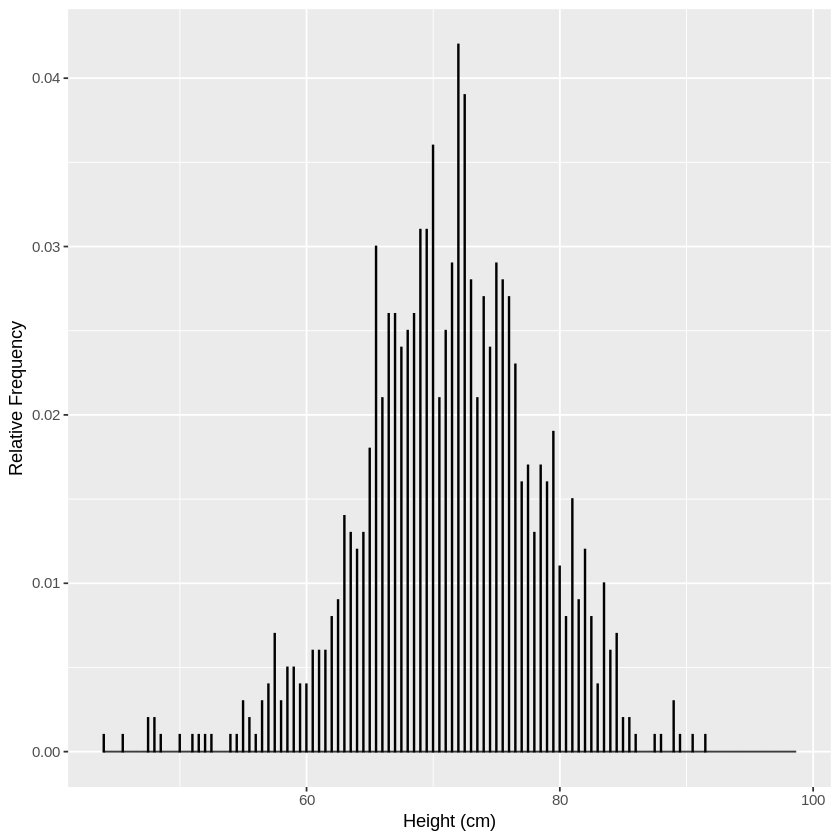

In [ ]:
samplesize = 2
nsimulations = 1000

sampleData = replicate(nsimulations, sample(dfHR$HeartRate_BPM, size = samplesize,
 prob = 1/length(dfHR$HeartRate_BPM)*c(1:length(dfHR$HeartRate_BPM)), replace = FALSE))

# Calculate the realized values of the sample mean (sample mean is a random variable)
sampleMean = apply(sampleData, 2, mean)
#sampleMean

# Mean of the simulated sample mean values
meanSampleMean = mean(sampleMean)
meanSampleMean

# Standard deviation of the simulated values of sample mean
sdSampleMean = sd(sampleMean)
sdSampleMean

# Histogram
delta = 0.05
dfSampleMean = as.data.frame(sampleMean)
colnames(dfSampleMean) = c('SampleMean')
p4 = ggplot(data = dfSampleMean) +
  geom_histogram(aes(x = SampleMean, y = after_stat(count)/sum(after_stat(count))),
  breaks = seq(meanSampleMean-4*sdSampleMean, meanSampleMean+4*sdSampleMean, by = delta),
  colour = 'black', fill = 'steelblue', alpha = 0.4) +
  labs(x = 'Height (cm)', y = 'Relative Frequency') +
  My_Theme
p4

In [ ]:
mean(dfSampleMean[['SampleMean']])

[1] 71.29

Suppose $X$ is a random variable with expected value $E[X]$ and standard deviation $\text{SD}[X].$ Note that $X$ need *not necessarily* be a normal random variable. We can form a new random variable as follows: $$Z = \frac{X-E[X]}{\text{SD}[X]}.$$ The random variable $Z$ can be seen as constructed from the original random variable $X$ by subtracting the expected value of $X$ (mean of $X$) and dividing by the standard deviation of $X.$ This process is called *standardizing* the random variable $X.$ The expected value of $Z$ is 0 and its standard deviation is 1.

In the example below, we choose $X\sim\text{N}(\mu = 170\,\text{cm},\,\sigma=8\,\text{cm})$ representing the random height of an individual in a population. The expected value $E[X] = \mu = 170$ and $\text{SD}[X] = \sigma =8 .$

$X\sim\text{Unif}(a = 0, b = 30).$ The expected value $E[X] = \frac{b+a}{2}$ and $\text{SD}[X] = \sqrt{\frac{(b-a)^2}{12}}.$

In [ ]:
mu = 170
sigma = 8
delta = 0.05
nsimulations = 1e5
simulatedData = rnorm(nsimulations, mean = mu, sd = sigma)

# Standardize simulated data
Z = (simulatedData - mu) / sigma
dfStd = as.data.frame(Z)
colnames(dfStd) = c('zScores')
p5 = ggplot(data = dfStd) +
  geom_histogram(aes(x = zScores, y = ..density..),
  breaks = seq(-3, 3, by = delta),
  colour = "black", fill = "steelblue") +
  stat_function(fun = dnorm, args = list(mean = 0, sd = 1)) +
  labs(x = 'Standardized Height (No Units)', y = 'Density') +
  My_Theme
p5
mean(Z)
sd(Z)

In [ ]:
mu = 170
sigma = 8
qnorm(0.9, mu, sigma) # The answer is 180 cm, which is called the 90th percentile
# or the 0.9th quantile
qnorm(0.5, mu, sigma) # The answer is called the 50th percentile or the 0.5th quantile
# The above is the median

x = seq(mu-4*sigma, mu+4*sigma, by = (8*sigma)/1000)
y = dnorm(x = x, mean = mu, sd = sigma)

df = data.frame(x, y)
p = ggplot(df) +
  geom_line(aes(x, y)) +
  geom_ribbon(data = df %>% filter(x <= 180.25),  aes(x = x,
                  ymin = 0, ymax = y), fill = "blue") +
  labs(x = 'x', y = 'f(x)', title = 'Probability Density Function of a Normal RV') +
  My_Theme
p
pnorm(180, mu, sigma)

In [ ]:
# 95% confidence
alpha = 1 - 0.95 # degree of doubt
# The (1-alpha/2)th quantile for the standard normal distribution
qnorm(1-alpha/2, mean = 0, sd = 1)
print('----')
# P(Z <= the (1-alpha/2)th quantile)
pnorm(qnorm(1-alpha/2, mean = 0, sd = 1), mean = 0, sd = 1)
1-alpha/2
print('----')
# P(Z >= the (1-alpha/2)th quantile)
pnorm(qnorm(1-alpha/2, mean = 0, sd = 1), mean = 0, sd = 1, lower.tail = FALSE)
alpha/2
print('----')
# P(Z <= the negative of the (1-alpha/2)th quantile)
pnorm(-qnorm(1-alpha/2, mean = 0, sd = 1), mean = 0, sd = 1)
alpha/2
print('----')
# P(the negative of the (1-alpha/2)th quantile <= Z <= the (1-alpha/2)th quantile)
pnorm(qnorm(1-alpha/2, mean = 0, sd = 1), mean = 0, sd = 1)-pnorm(-qnorm(1-alpha/2, mean = 0, sd = 1), mean = 0, sd = 1)
1-alpha

In [ ]:
n = 10
p = 0.5
1 - pbinom(6, n, p) # P(X|NH >= 7), X|NH ~ Bin(n = 10, p = 0.5)

[1] 0.171875

Confidence interval calculation

In [ ]:
mu = 170
sigma = 8

CIpercentage = 95 # Confidence level
alpha = 1-CIpercentage/100 # Diffidence level

#set.seed(1)

# Number of simulations
nsimulations =  1e3

# Sample size
samplesize = 100

# Simulate data
simulatedData = replicate(nsimulations, rnorm(samplesize, mean = mu, sd = sigma))
#simulatedData

# Function to calculate confidence interval
computeCI = function(data){
  lower_bound = mean(data) - qnorm(1-alpha/2)*sd(data)/sqrt(length(data))
  upper_bound = mean(data) + qnorm(1-alpha/2)*sd(data)/sqrt(length(data))
  return(c(lower_bound, upper_bound))
  }

confidence_intervals = apply(simulatedData, 2, computeCI)
print(confidence_intervals[, 1])

# Percentage of intervals that contain the true value of the parameter mu = 170
checkCI = function(bound){
   return(between(mu, bound[1], bound[2]))
 }
mean(apply(confidence_intervals, 2, checkCI))*100